In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
train_data = datasets.MNIST(
    root = "data",
    download = True,
    train = True,
    transform = ToTensor()    
)
test_data = datasets.MNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor()    
)

In [3]:
def train(model, data, loss_fn, opti, device):
    model.train()
    num_batches = len(data)
    loss = 0

    for X, y in data:
        X, y = X.to(device), y.to(device)
        y_hat = model(X)

        L = loss_fn(y_hat, y)
        loss += L.item()
        L.backward()
        
        opti.step()
        opti.zero_grad()
    return loss/num_batches

def test(model, data, loss_fn, device):
    model.eval()
    loss = 0
    num_batch = len(data)
    with torch.no_grad():
        for X, y in data:
            X, y = X.to(device), y.to(device)
            loss += loss_fn(model(X), y).item()
    return loss/num_batch

In [6]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.module = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax()
        )

    def forward(self, x):
        return self.module(self.flat(x))


device = "cuda"
model = Model().to(device)
print(model)

Model(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (module): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
    (5): Softmax(dim=None)
  )
)


In [ ]:
train_loss = []
test_loss = []

In [15]:
import time

In [18]:
batch_size = 1024
epochs = 150
leraning_rate = 5e-3

train_data_loader = DataLoader(train_data, batch_size=batch_size)
test_data_loader = DataLoader(test_data, batch_size=batch_size)

loss_fn = nn.CrossEntropyLoss()
opti = torch.optim.SGD(model.parameters(), lr = leraning_rate)


for _ in range(epochs):
    s = time.time()
    train_loss.append(train(model, train_data_loader, loss_fn, opti,device))
    test_loss.append(test(model, test_data_loader, loss_fn, device))
    e = time.time()
    e = round(e - s, 3)
    print(_, round(train_loss[-1],4), round(test_loss[-1],4), e)

c:\myInstallations\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0 1.6275 1.6232 7.896
1 1.6275 1.6231 7.698
2 1.6274 1.6231 7.727
3 1.6274 1.623 7.6
4 1.6273 1.623 7.551
5 1.6273 1.6229 7.622
6 1.6272 1.6229 7.575
7 1.6271 1.6228 7.557
8 1.6271 1.6228 7.527
9 1.627 1.6228 7.644
10 1.627 1.6227 7.541
11 1.6269 1.6227 7.581
12 1.6269 1.6226 7.55
13 1.6268 1.6226 7.632
14 1.6268 1.6225 7.543
15 1.6267 1.6225 7.547
16 1.6267 1.6224 7.528
17 1.6266 1.6224 7.631
18 1.6265 1.6223 7.538
19 1.6265 1.6223 7.549
20 1.6264 1.6222 7.562
21 1.6264 1.6222 7.638
22 1.6263 1.6221 7.53
23 1.6263 1.6221 7.542
24 1.6262 1.6221 7.536
25 1.6262 1.622 7.662
26 1.6261 1.622 7.562
27 1.6261 1.6219 7.562
28 1.626 1.6219 7.534
29 1.626 1.6218 7.659
30 1.6259 1.6218 7.559
31 1.6259 1.6217 7.547
32 1.6258 1.6217 7.559
33 1.6258 1.6216 7.644
34 1.6257 1.6216 7.541
35 1.6257 1.6216 7.562
36 1.6256 1.6215 7.638
37 1.6256 1.6215 7.555
38 1.6255 1.6214 7.544
39 1.6255 1.6214 7.563
40 1.6254 1.6213 7.643
41 1.6254 1.6213 7.559
42 1.6253 1.6213 7.54
43 1.6253 1.6212 7.619
44 1.6252 1

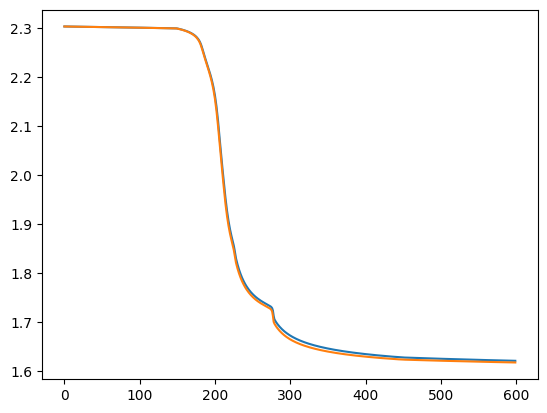

In [20]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.show()

In [21]:
def accuracy(model, data, device):
    model.eval()
    ok = 0
    total = 0
    with torch.no_grad():
        for X, y in data:
            X, y = X.to(device), y.to(device)
            y_hat = model(X)
            total += y.shape[0]
            ok += (y_hat.argmax(1) == y).type(torch.float).sum().item()
    return ok/total

In [23]:
accuracy(model, train_data_loader, device)

c:\myInstallations\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.8471166666666666

In [24]:
accuracy(model, test_data_loader, device)

c:\myInstallations\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0.8491

In [12]:
! shutdown /h